## Clean data

In [109]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler

In [110]:
df = pd.read_csv("RawData.csv")
df

,ID,List ID,Posted Time,Status,Transaction Type,Seller Name,Seller ID,Region (Code),Region Name,Category,...,First Image Link,Image List,Number of Images,Thumbnail Image,Map Image,Ward Name,Property Features,Additional Features,Land Type (Text),Width (Text)
0,154269561,113584228,31/01/2025,accepted,s,Khang anh,24585559,3,Đà Nẵng,1040,...,https://cdn.chotot.com/39I61g4Z4HaQKXOJo4_MW1S...,https://cdn.chotot.com/39I61g4Z4HaQKXOJo4_MW1S...,8,https://cdn.chotot.com/Trr4BbH7JLZnH-Ur7w7o7H4...,https://cdn.chotot.com/admincentre/location/16...,Phường Hòa Minh,2; 4,NaN,Đất nông nghiệp,Ngang 4 m
1,164081534,122031985,07/02/2025,accepted,s,Minh trí,12588075,3,Đà Nẵng,1040,...,https://cdn.chotot.com/Hsr-tGM2Rr24qj1WWtoGLDO...,https://cdn.chotot.com/Hsr-tGM2Rr24qj1WWtoGLDO...,5,https://cdn.chotot.com/SoG8KUcnMwYDUADSsfYLQ_e...,https://cdn.chotot.com/admincentre/location/16...,Phường Hòa Khánh Nam,3,NaN,Đất nông nghiệp,Ngang 5 m
2,156854814,115807159,31/01/2025,accepted,s,Khang anh,24585559,3,Đà Nẵng,1040,...,https://cdn.chotot.com/9Ig90eUQZTlpbohXsaHacff...,https://cdn.chotot.com/9Ig90eUQZTlpbohXsaHacff...,8,https://cdn.chotot.com/XVe5iWlj4zqkUpk39SURzI3...,https://cdn.chotot.com/admincentre/location/16...,Phường Hòa Khánh Nam,2; 3; 4,NaN,Đất nông nghiệp,Ngang 10 m
3,163242245,121308677,31/01/2025,accepted,s,Khang anh,24585559,3,Đà Nẵng,1040,...,https://cdn.chotot.com/YB5LYLM1jC3Ioy_54Zeg9wE...,https://cdn.chotot.com/YB5LYLM1jC3Ioy_54Zeg9wE...,10,https://cdn.chotot.com/1ENRKLeyLCaq8xxE5h0ZB7H...,https://cdn.chotot.com/admincentre/location/16...,Phường Hòa Phát,4; 2; 3,NaN,Đất nông nghiệp,Ngang 5 m
4,162985943,121088552,01/02/2025,accepted,s,Khang anh,4483578,3,Đà Nẵng,1040,...,https://cdn.chotot.com/wWdkqHNA151A5o-Lo7s6D5l...,https://cdn.chotot.com/wWdkqHNA151A5o-Lo7s6D5l...,6,https://cdn.chotot.com/3rOmXj8yeL8XL-iQf8MzbCp...,https://cdn.chotot.com/admincentre/location/16...,Phường Hòa Khánh Bắc,4; 2,NaN,Đất nông nghiệp,Ngang 5 m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,164166442,122105081,01/01/2025,accepted,s,Johnny Nguyễn,12984884,3,Đà Nẵng,1040,...,https://cdn.chotot.com/b1UIWiE_1lM5KfO-aYIvV62...,https://cdn.chotot.com/b1UIWiE_1lM5KfO-aYIvV62...,4,https://cdn.chotot.com/I8EBh4TxpIt0lvp8hPlpoXr...,https://cdn.chotot.com/admincentre/location/16...,Phường Hòa Cường Nam,1,NaN,Đất thổ cư,Ngang 55 m
3219,164338766,122253496,08/01/2025,accepted,s,Chính Chủ,22921043,3,Đà Nẵng,1040,...,https://cdn.chotot.com/xj-Iavw0SZmaZ2v5Al5IGmz...,https://cdn.chotot.com/xj-Iavw0SZmaZ2v5Al5IGmz...,6,https://cdn.chotot.com/vqdhGdf-qOmiRQ9orGjGROv...,https://cdn.chotot.com/admincentre/location/16...,Phường Hòa Minh,NaN,NaN,Đất thổ cư,NaN
3220,163817823,121804172,09/01/2025,accepted,s,Tran ngoc thanh,12109157,3,Đà Nẵng,1040,...,https://cdn.chotot.com/Bv1ffROcxEA6TvYQ519JHei...,https://cdn.chotot.com/Bv1ffROcxEA6TvYQ519JHei...,3,https://cdn.chotot.com/SyNj5ELmnEgEfPGmklz0slk...,https://cdn.chotot.com/admincentre/location/16...,Phường Khuê Trung,1; 2,NaN,Đất thổ cư,Ngang 4.5 m
3221,164355152,122267719,09/01/2025,accepted,s,Ry,24099488,3,Đà Nẵng,1040,...,https://cdn.chotot.com/BwojnswKST9d5qVX2_YFaIw...,https://cdn.chotot.com/BwojnswKST9d5qVX2_YFaIw...,3,https://cdn.chotot.com/DxGYU2YDFx1xLevF4H9G5QU...,https://cdn.chotot.com/admincentre/location/15...,Phường Hoà Quý,NaN,NaN,Đất nền dự án,Ngang 5 m


In [111]:
df = pd.read_csv("RawData.csv")

df = df[
    [
        "Ward Name", "Street Name", "Longitude", "Latitude",
        "Area (m²)", "Width (m)", "Length (m)", "Land Type", 
        "Legal Status", "House Direction", "Property Features", "Price"
    ]
]

df_initial = df.copy()
df

,Ward Name,Street Name,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Property Features,Price
0,Phường Hòa Minh,Thanh vinh 15,108.169500,16.065700,100.0,4.0,25.0,4,6,5.0,2; 4,150000000
1,Phường Hòa Khánh Nam,Đường Hoàng Văn Thái,108.158270,16.053888,102.0,5.0,23.0,4,6,8.0,3,165000000
2,Phường Hòa Khánh Nam,Đường Đà Sơn,108.150700,16.058900,150.0,10.0,15.0,4,6,6.0,2; 3; 4,250000000
3,Phường Hòa Phát,Vũ lăng,108.172516,16.028736,100.0,5.0,20.0,4,5,6.0,4; 2; 3,250000000
4,Phường Hòa Khánh Bắc,Âu cơ,108.136940,16.077059,100.0,5.0,20.0,4,5,4.0,4; 2,250000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3218,Phường Hòa Cường Nam,Đường Trần Đăng Ninh,108.229570,16.031054,1350.0,55.0,25.0,1,1,1.0,1,120000000000
3219,Phường Hòa Minh,Phường Hòa Minh,108.169550,16.065733,9123.0,NaN,NaN,1,1,NaN,NaN,150000000000
3220,Phường Khuê Trung,Đường Đỗ Thúc Tịnh,108.211190,16.022854,81.0,4.5,20.0,1,1,7.0,1; 2,295000000000
3221,Phường Hoà Quý,phạm đình bân,108.233420,15.982958,100.0,5.0,20.0,2,1,5.0,NaN,325000000000


### Handling missing data

#### Lost data statistics

In [112]:
print(df.isnull().sum())

Ward Name               0
Street Name             0
Longitude               0
Latitude                0
Area (m²)               0
Width (m)             532
Length (m)            921
Land Type               0
Legal Status            0
House Direction      1153
Property Features     968
Price                   0
dtype: int64


#### For the Width (m) and Length (m) variables

*After the statistics we know that the area data is complete, then check if there is width but no length or vice versa, then use the area calculation formula. If both features are empty, the default is 5 for width and 5 for length*

In [113]:
# If Length (m) is empty but Width (m) exists, then calculate Length (m)
df.loc[df["Length (m)"].isna() & df["Width (m)"].notna(), "Length (m)"] = (
df["Area (m²)"] / df["Width (m)"]
)

# If Width (m) is empty but Length (m) exists, then calculate Width (m)
df.loc[df["Width (m)"].isna() & df["Length (m)"].notna(), "Width (m)"] = (
df["Area (m²)"] / df["Length (m)"]
)

# If both Width (m) and Length (m) are empty, set Width (m) = 5 and calculate Length (m)
missing_indexes = df[df["Width (m)"].isna() & df["Length (m)"].isna()].index
df.loc[missing_indexes, "Length (m)"] = df.loc[missing_indexes, "Area (m²)"] / 5
df.loc[missing_indexes, "Width (m)"] = 5

*It is clear to see the big change in data distribution, but for land data, I think the above approach is reasonable.*

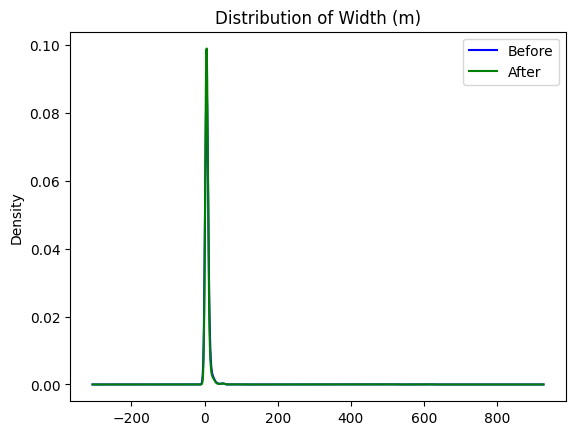

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_initial["Width (m)"].dropna().plot(kind='kde', ax=ax, color='blue', label="Before")
df["Width (m)"].dropna().plot(kind='kde', ax=ax, color='green', label="After")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

ax.set_title("Distribution of Width (m)")
plt.show()

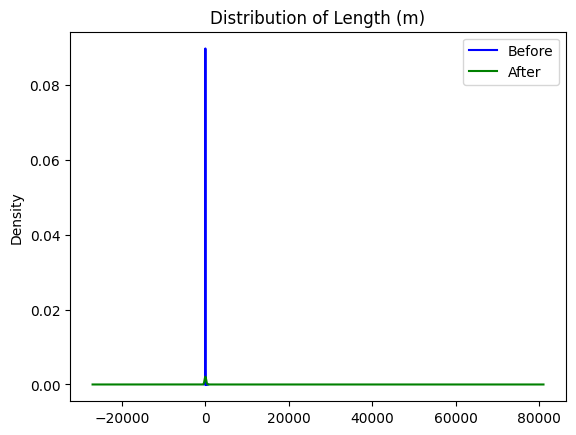

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_initial["Length (m)"].dropna().plot(kind='kde', ax=ax, color='blue', label="Before")
df["Length (m)"].dropna().plot(kind='kde', ax=ax, color='green', label="After")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

ax.set_title("Distribution of Length (m)")
plt.show()

#### For the feature variable *House Direction*, use the random method instead.       

In [116]:
def replace_invalid_house_direction(direction):
    if pd.isna(direction):
        return random.randint(1, 8)
    return direction  

df["House Direction"] = df["House Direction"].apply(replace_invalid_house_direction)

*With this method we can retain the distribution trend of the feature*

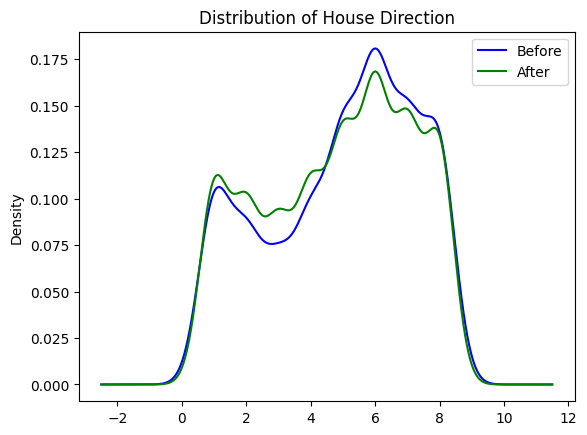

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_initial["House Direction"].dropna().plot(kind='kde', ax=ax, color='blue', label="Before")
df["House Direction"].dropna().plot(kind='kde', ax=ax, color='green', label="After")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

ax.set_title("Distribution of House Direction")
plt.show()


#### For the *Property Features* variable, if the *land type* is residential land, the default *Property Features* has the value 3 (partly residential land), otherwise it is assumed to be 2 (non-residential land).

In [118]:
df.loc[(df["Land Type"] == 1) & (df["Property Features"].isna()), "Property Features"] = "3"
df.loc[(df["Land Type"] != 1) & (df["Property Features"].isna()), "Property Features"] = "2"

*Although the data distribution changes, it is not significant*

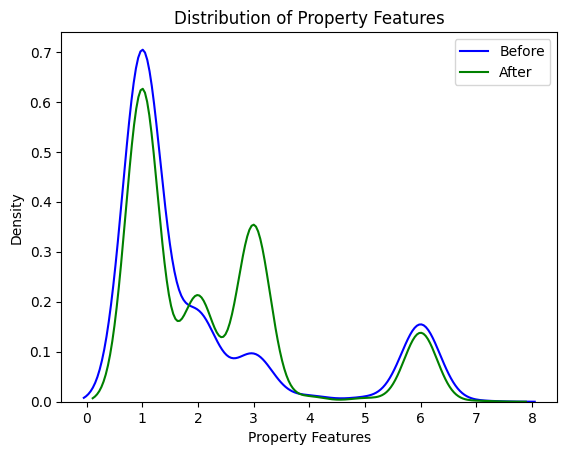

In [119]:
# Convert the 'Property Features' column into a list
df_initial["Property Features"] = df_initial["Property Features"].astype(str).str.split(";")
df["Property Features"] = df["Property Features"].astype(str).str.split(";")

# Expand each value in the array into separate rows
df_initial_exploded = df_initial.explode("Property Features")
df_exploded = df.explode("Property Features")

# Convert values to numeric type
df_initial_exploded["Property Features"] = pd.to_numeric(df_initial_exploded["Property Features"], errors="coerce")
df_exploded["Property Features"] = pd.to_numeric(df_exploded["Property Features"], errors="coerce")

# Plot KDE
fig = plt.figure()
ax = fig.add_subplot(111)

sns.kdeplot(df_initial_exploded["Property Features"].dropna(), ax=ax, color='blue', label="Before")
sns.kdeplot(df_exploded["Property Features"].dropna(), ax=ax, color='green', label="After")

ax.legend()
ax.set_title("Distribution of Property Features")
plt.show()


##### Check for lost data

In [120]:
print(df.isnull().sum())

Ward Name            0
Street Name          0
Longitude            0
Latitude             0
Area (m²)            0
Width (m)            0
Length (m)           0
Land Type            0
Legal Status         0
House Direction      0
Property Features    0
Price                0
dtype: int64


### Xử lí dữ liệu ngoại lệ (outliers)

In [121]:
df_noOutliers = df.copy()

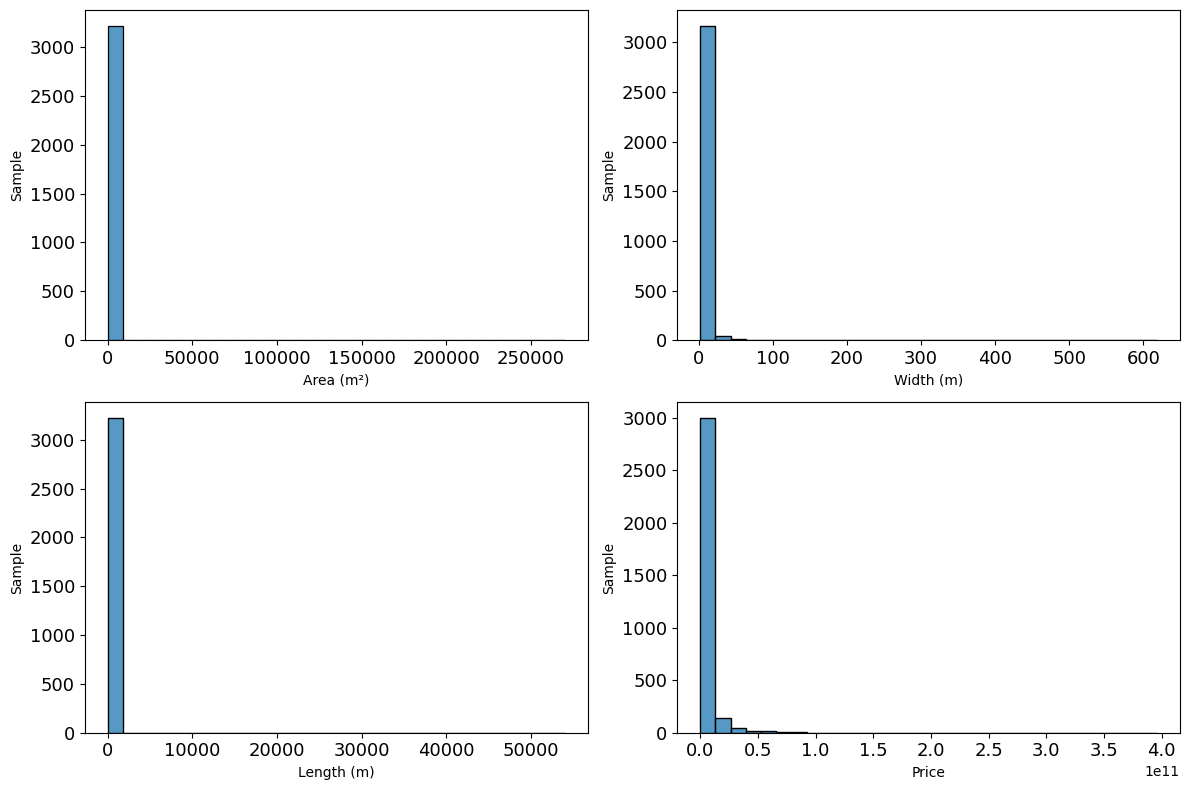

In [122]:
numerical_columns = ["Area (m²)", "Width (m)",	"Length (m)", "Price"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, bins=30)
    plt.ylabel('Sample')
    plt.xlabel(col)
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()


The data of *Area (m²)*, *Width (m)*, *Length (m)*, *Price* have skewed distribution.                                                            

#### Skewed distribution

In [123]:
cols = ["Area (m²)",	"Width (m)",	"Length (m)", "Price"]

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 4 * iqr 
    lower_bound = q1 - 4 * iqr 
    outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    df.loc[df[col] > upper_bound, col] = upper_bound
    df.loc[df[col] < lower_bound, col] = lower_bound

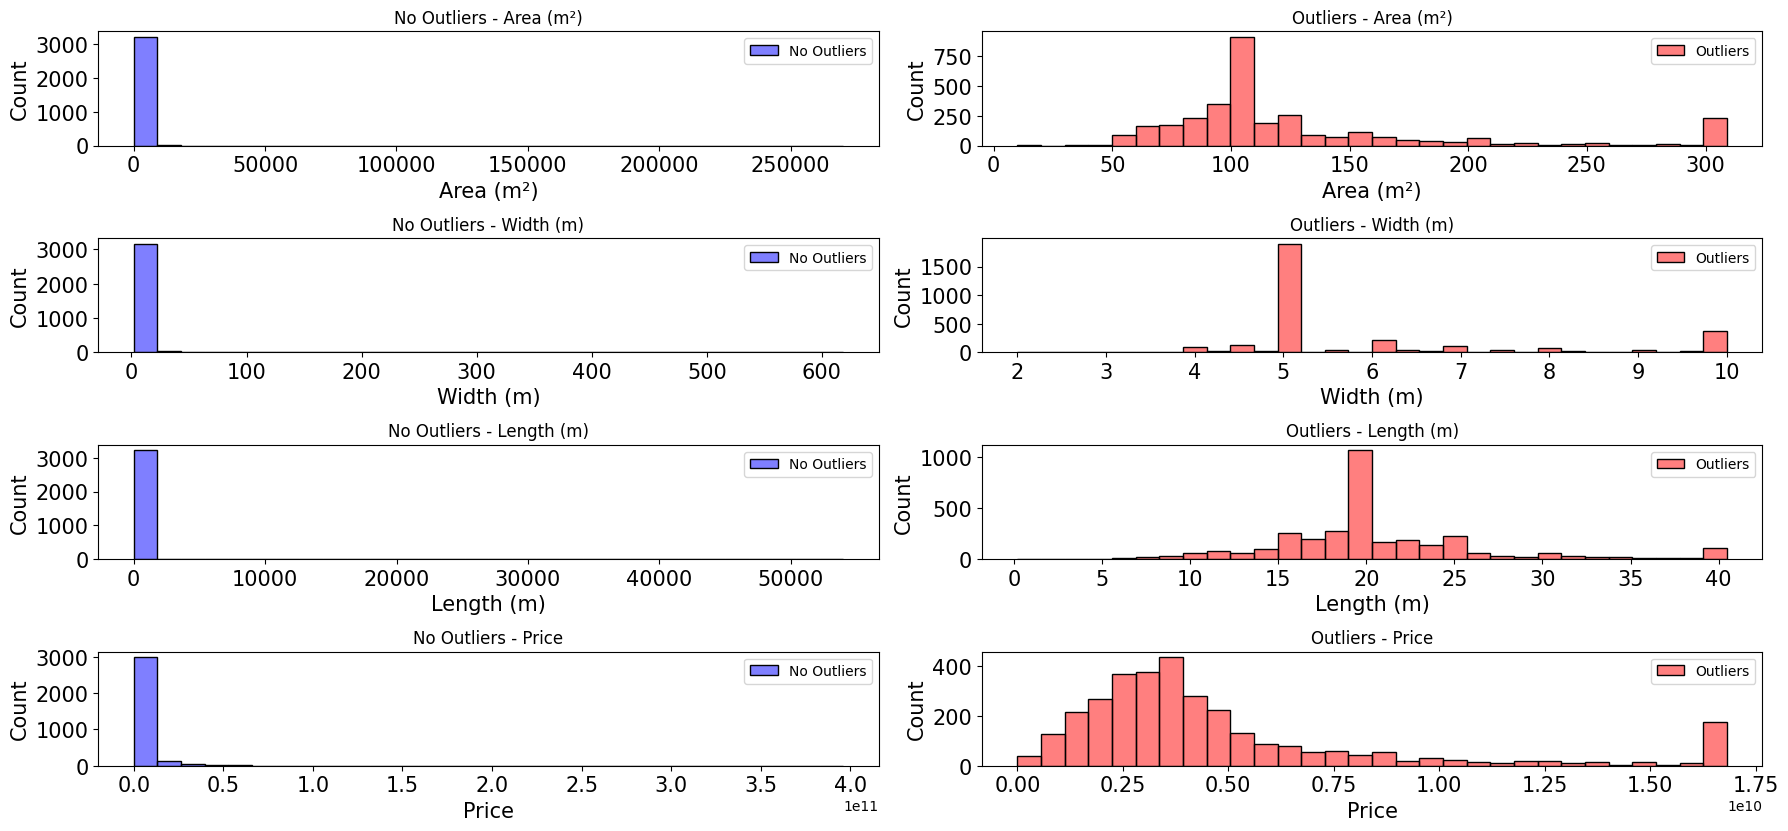

In [124]:
cols = ["Area (m²)",	"Width (m)",	"Length (m)", "Price"]

plt.figure(figsize=(18, 12))
for i, col in enumerate(cols, 1):
    plt.subplot(6, 2, 2*i-1) 
    sns.histplot(data=df_noOutliers, x=col, bins=30, color='blue', alpha=0.5, label='No Outliers')
    plt.ylabel('Count', fontsize = 15)
    plt.xlabel(col, fontsize = 15)   
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15) 
    plt.title('No Outliers - ' + col)
    plt.legend()

    plt.subplot(6, 2, 2*i) 
    sns.histplot(data=df, x=col, bins=30, color='red', alpha=0.5, label='Outliers')
    plt.ylabel('Count', fontsize = 15)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15) 
    plt.title('Outliers - ' + col)
    plt.legend()

plt.tight_layout()
plt.show()

In [125]:
df.to_csv('CleanData.csv', index=False)

## Conclusion

#### Clean data reduces risk and errors                                          

<li>Remove blank, incorrect, or noisy values ​​from the data set. This helps ensure that we only work with reliable and accurate information. </li>
<li>When we encounter unusual or outlier values, outlier handling helps minimize the impact of these values ​​on the final results.</li>

#### Increase data consistency and uniformity

<li>Helps to bring the units of measurement into the same range, reducing the difference in proportions between variables. Standardization makes analysis and comparison between variables easier and more accurate. </li>
<li>This is especially important when we want to compare the correlation between variables.</li>